## Análise de Emissões de CO2 Global: Padrões e Predições
## Descrição Projeto

Este projeto explora dados de emissões de CO2 por países e regiões ao longo dos anos, analisando padrões e tendências globais. Através de estatística descritiva, visualizações avançadas e modelagem preditiva, investigamos fatores que influenciam as emissões e desenvolvemos modelos de aprendizado de máquina para prever emissões futuras. A análise visa destacar insights relevantes para a sustentabilidade global.\

## Participantes

- Gabriel Antony Cadima Ciziks | RM98215
- Cassio Valezzi | RM551059
- Lucca Tambellini | RM 98169



1. Importando Bibliotecas e carregando dados

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler




In [2]:
# Carregando os dados
carbono_dataset = "./Carbon_(CO2)_Emissions_by_Country.csv"
df = pd.read_csv(carbono_dataset)

# Visualização inicial
print(df.head())
print(df.columns)

       Country Region        Date  Kilotons of Co2  Metric Tons Per Capita
0  Afghanistan   Asia  01-01-2011           8930.0                    0.31
1  Afghanistan   Asia  01-01-2012           8080.0                    0.27
2  Afghanistan   Asia  01-01-2010           7110.0                    0.25
3  Afghanistan   Asia  01-01-2019           6080.0                    0.16
4  Afghanistan   Asia  01-01-2018           6070.0                    0.17
Index(['Country', 'Region', 'Date', 'Kilotons of Co2',
       'Metric Tons Per Capita'],
      dtype='object')


2. Limpeza dos Dados

In [3]:
# Verificar dados ausentes
missing_data = df.isnull().sum()
print(missing_data)
# Tratando valores ausentes
df.dropna(inplace=True)

# Convertendo a coluna de datas para datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = pd.to_datetime(df['Date']).dt.year
# Verificando tipos de dados
df.info()



Country                   0
Region                    0
Date                      0
Kilotons of Co2           0
Metric Tons Per Capita    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Country                 5677 non-null   object        
 1   Region                  5677 non-null   object        
 2   Date                    5677 non-null   datetime64[ns]
 3   Kilotons of Co2         5677 non-null   float64       
 4   Metric Tons Per Capita  5677 non-null   float64       
 5   Year                    5677 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(2)
memory usage: 244.1+ KB


3. Estatísticas Descritivas

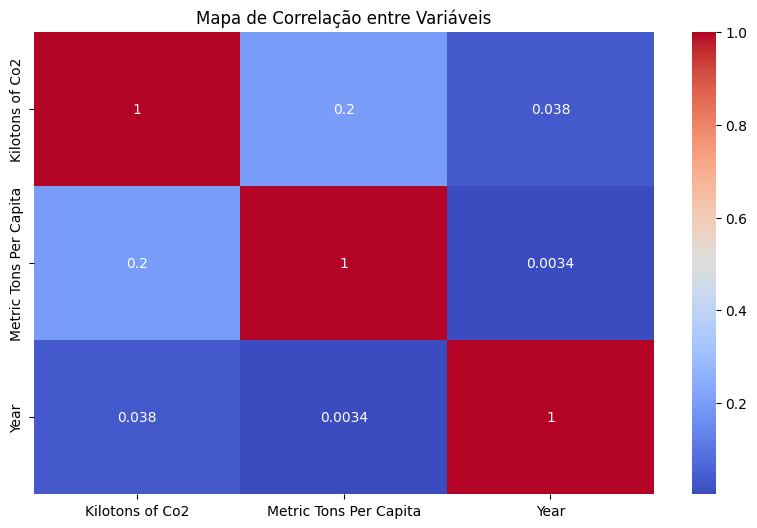

In [4]:

# Estatísticas básicas
df.describe()

"""
## Visualizações Avançadas
Criando gráficos para explorar padrões de emissões globais e regionais.
"""

# Gráfico de correlação (somente para colunas numéricas)
plt.figure(figsize=(10, 6))

# Selecionar apenas as colunas numéricas para o cálculo de correlação
numerical_data = df.select_dtypes(include=[np.number])

# Gerar o heatmap
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Correlação entre Variáveis")
plt.show()



## 4. Análise Visual
### Perguntas e Respostas

#### Pergunta 1-3
##### Gráficos: Comparação de Emissões de CO₂ em Kilotons   || Comparação de Emissões de CO₂ em Toneladas per Capita

1) Como o Brasil se compara com os demais em Emissão de CO2? O que essa comparação sugere?
- Com base no gráfico, o Brasil apresenta as menores emissões de CO₂ em kilotons ao longo de todo o período analisado (1990 a 2020) em comparação com as demais categorias (EUA, América e Resto do Mundo). Suas emissões permanecem relativamente estáveis, sem grandes variações ao longo dos anos.
- Ela sugere que, em termos globais, o Brasil tem uma contribuição relativamente pequena para as emissões totais de CO₂, especialmente quando comparado ao "Resto do Mundo" e aos EUA.

2) Como o Brasil de compara com os demais em Emissão de CO2 em Toneladas per Capita?

- O Brasil apresenta consistentemente as menores emissões de CO₂ per capita no gráfico, com valores bem abaixo dos EUA e da média do resto do mundo. Isso reflete a matriz energética brasileira, que é fortemente baseada em fontes renováveis, como hidrelétricas, e um menor consumo per capita de combustíveis fósseis. Em comparação com a média da América, o Brasil também mantém uma posição inferior, indicando um desempenho ambiental mais sustentável nessa métrica.

3) Quais mudanças na emissão de CO₂ per capita nos EUA explicam o padrão de redução entre 2005 e 2020 observado no gráfico, e como isso impactou sua posição relativa ao resto do mundo?

- Entre 2005 e 2020, os EUA apresentaram uma queda acentuada na emissão de CO₂ per capita, que pode ser atribuída a fatores como o aumento do uso de fontes de energia renováveis, a substituição de carvão por gás natural em usinas, e iniciativas de eficiência energética. Apesar dessa redução, os EUA ainda permanecem como um dos maiores emissores per capita, muito acima da média global e das regiões analisadas no gráfico.

In [5]:
# Brasil
brazil = df[df['Country'] == 'Brazil'].sort_values(by="Date")

# EUA
usa = df[df['Country'] == 'United States'].sort_values(by="Date")

# REsto do Mundo
global_data = df[df['Country'] != 'Brazil'].groupby('Date').agg({
    'Kilotons of Co2': 'sum',
    'Metric Tons Per Capita': 'mean'
}).reset_index()

# América
america = df[df['Region'] == 'Americas'].groupby('Date').agg({
    'Kilotons of Co2': 'sum',
    'Metric Tons Per Capita': 'mean'
}).reset_index()



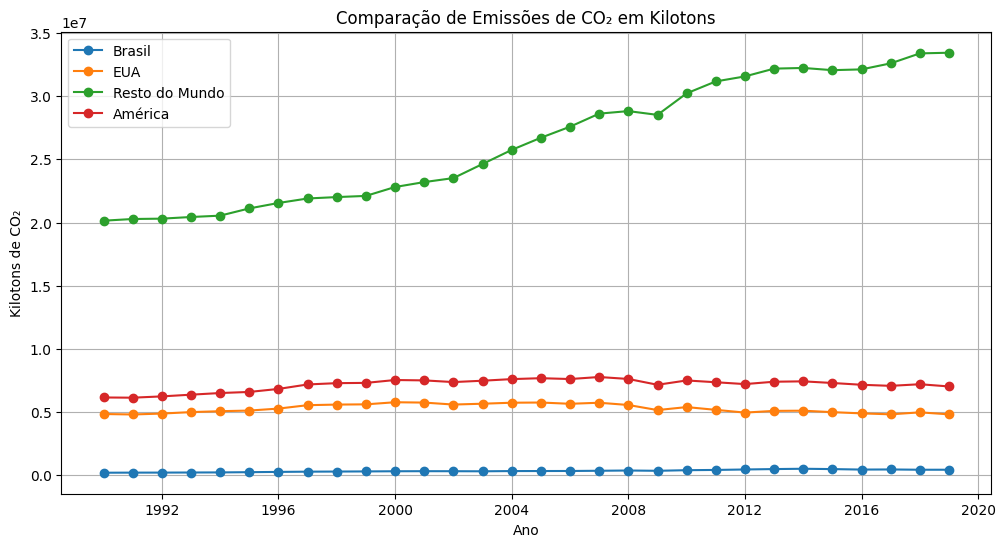

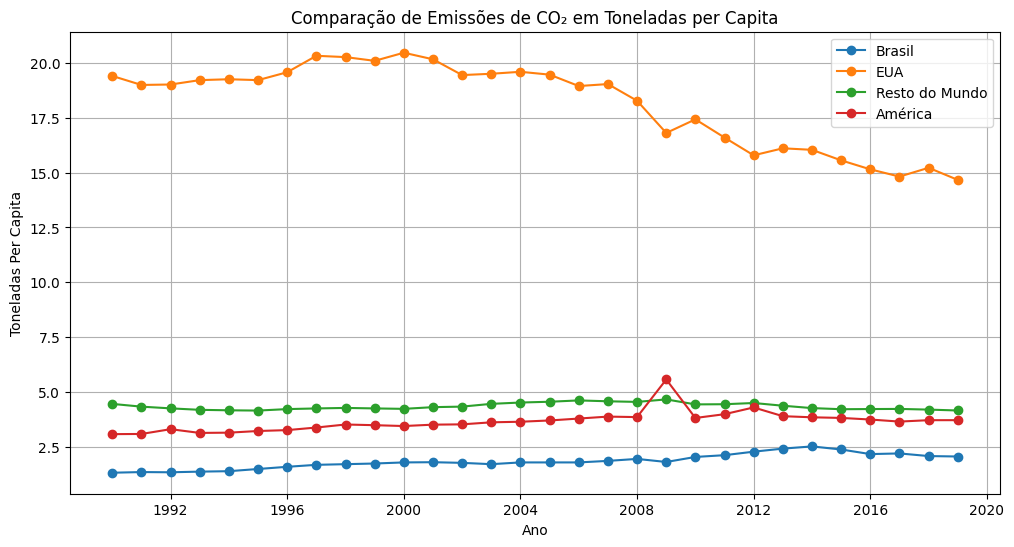

In [6]:
# Comparação Emissão de CO2 em Kilotons entre Brasil,EUA, América e Resto do Mundo
plt.figure(figsize=(12, 6))
plt.plot(brazil['Date'], brazil['Kilotons of Co2'], label="Brasil", marker='o')
plt.plot(usa['Date'], usa['Kilotons of Co2'], label="EUA", marker='o')
plt.plot(global_data['Date'], global_data['Kilotons of Co2'], label="Resto do Mundo", marker='o')
plt.plot(america['Date'], america['Kilotons of Co2'], label="América", marker='o')

plt.title('Comparação de Emissões de CO₂ em Kilotons')
plt.xlabel('Ano')
plt.ylabel('Kilotons de CO₂')
plt.legend()
plt.grid(True)
plt.show()

# Comparação Emissão de CO2 em Toneladas per Capita entre Brasil,EUA, América e Resto do Mundo
plt.figure(figsize=(12, 6))
plt.plot(brazil['Date'], brazil['Metric Tons Per Capita'], label="Brasil", marker='o')
plt.plot(usa['Date'], usa['Metric Tons Per Capita'], label="EUA", marker='o')
plt.plot(global_data['Date'], global_data['Metric Tons Per Capita'], label="Resto do Mundo", marker='o')
plt.plot(america['Date'], america['Metric Tons Per Capita'], label="América", marker='o')

plt.title('Comparação de Emissões de CO₂ em Toneladas per Capita')
plt.xlabel('Ano')
plt.ylabel('Toneladas Per Capita')
plt.legend()
plt.grid(True)
plt.show()

#### Perguntas 4-6
##### Gráficos: Tendência de Emissões de CO2 por Região   || Emissões Totais por Região ||     Proporção de Emissões de CO2 por Região
4) Qual região apresentou o maior aumento nas emissões de CO2 ao longo do tempo? E a mais baixas?
- O continente asiático apresentou o maior aumento de emissões, enquanto a Oceania apresentou a mais baixa emissão.

5) Como as emissões de CO2 se comportaram ao longo do tempo? Alguma observação possível referente aos continentes?
- As emissões da Europa diminuíram gradualmente durante o período, enquanto as emissões da África aumentaram ligeriamente ao longo do tempo.

6) Há alguma região com emissões relativamente estáveis?
- A Oceania apresentou as emissões mais estáveis de todas as regiões durante o período análisado.

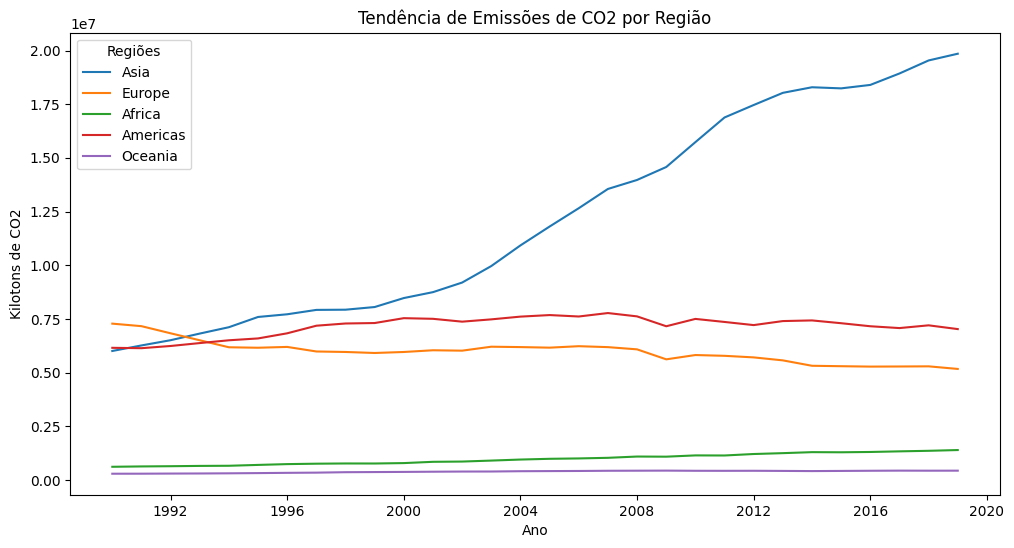

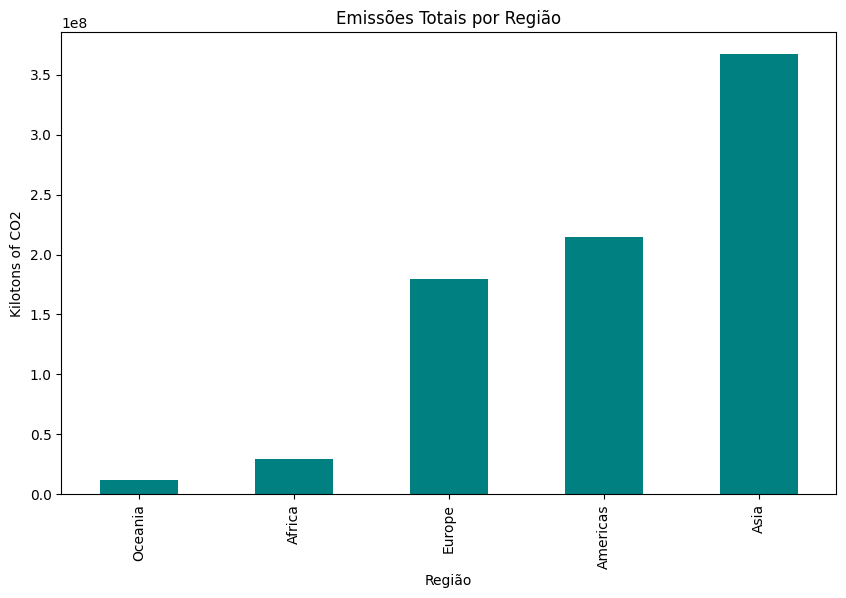

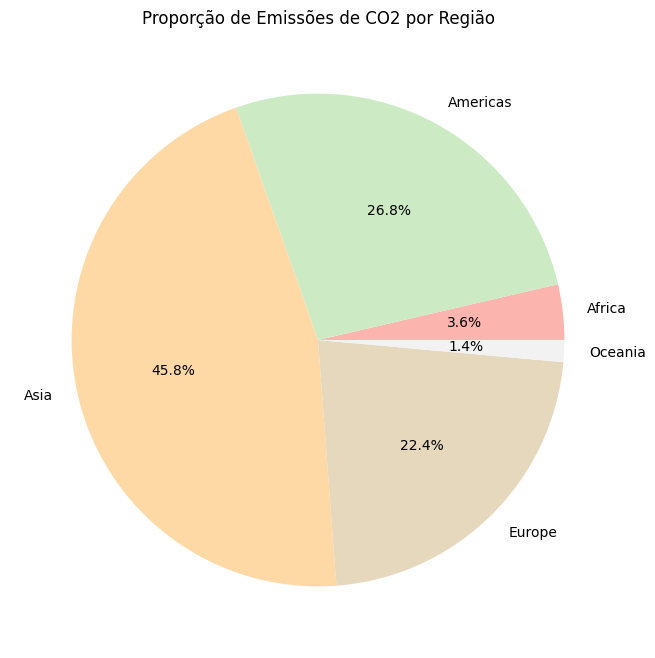

In [7]:
# Tendência de Emissões
plt.figure(figsize=(12, 6))
for region in df['Region'].unique():
    subset = df[df['Region'] == region]
    subset_grouped = subset.groupby('Date')['Kilotons of Co2'].sum()
    plt.plot(subset_grouped.index, subset_grouped.values, label=region)

plt.title("Tendência de Emissões de CO2 por Região")
plt.xlabel("Ano")
plt.ylabel("Kilotons de CO2")
plt.legend(title="Regiões")
plt.show()

# Emissões Totais por Região
plt.figure(figsize=(10, 6))
region_totals = df.groupby('Region')['Kilotons of Co2'].sum()
region_totals.sort_values().plot(kind='bar', color='teal')

plt.title("Emissões Totais por Região")
plt.xlabel("Região")
plt.ylabel("Kilotons of CO2")
plt.show()

# Proporções por Região - Pizza
region_proportions = df.groupby('Region')['Kilotons of Co2'].sum()
region_proportions.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), cmap='Pastel1')

plt.title("Proporção de Emissões de CO2 por Região")
plt.ylabel("")
plt.show()


#### Perguntas 7-10
##### Gráficos: Distribuição de Emissões Per Capita por Região   || Pairplot das Regiões
7) Quais regiões possuem valores significativos tanto em Kilotons of CO2 quanto em Metric Tons Per Capita?
- Europa e Américas apresentam uma combinação de valores relativamente altos em ambas as métricas.

8) O que pode ser interpretado dos valores baixos em Metric Tons Per Capita em regiões com alta emissão em Kilotons of CO2?
- Isso sugere que essas regiões possuem populações maiores, diluindo as emissões por habitante, como ocorre na Ásia.

9) Há alguma correlação visível entre Kilotons of CO2 e Metric Tons Per Capita no gráfico?
- Existe uma correlação fraca, pois países com altas emissões totais nem sempre têm altas emissões per capita, como na Ásia.

10) Quais padrões visuais indicam diferenças econômicas ou de desenvolvimento entre regiões?
Regiões com altas emissões per capita (Oceania, Américas) podem indicar economias desenvolvidas com maior consumo energético per capita, enquanto regiões como África têm baixas emissões per capita.

C:\Users\bielc\AppData\Local\Temp\ipykernel_17504\180217428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Metric Tons Per Capita', palette='Set2')


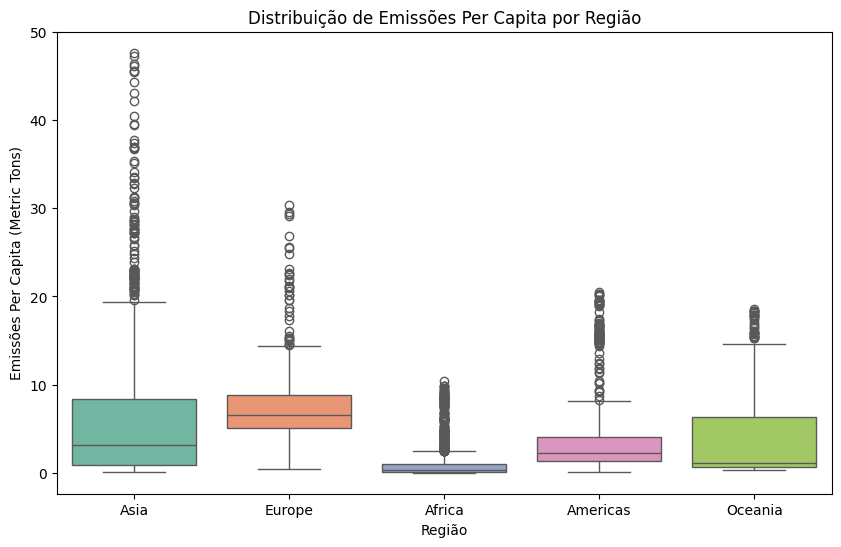

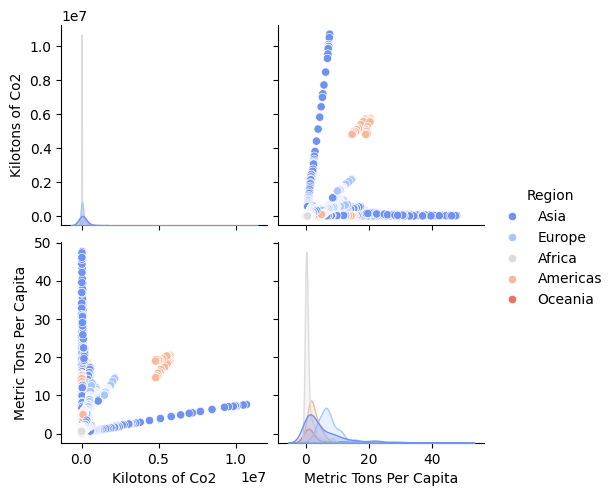

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Metric Tons Per Capita', palette='Set2')

plt.title("Distribuição de Emissões Per Capita por Região")
plt.xlabel("Região")
plt.ylabel("Emissões Per Capita (Metric Tons)")
plt.show()

sns.pairplot(data=df, hue='Region', vars=['Kilotons of Co2', 'Metric Tons Per Capita'], palette='coolwarm')
plt.show()


#### 5. Machine Learning

##### Leitura, limpeza do Dataset e Estatisticas Descritivas

In [9]:
df_ml= pd.read_csv("global-data-on-sustainable-energy (1).csv")
print(df_ml.describe())
print(df_ml.info())


              Year  Access to electricity (% of population)  \
count  3649.000000                              3639.000000   
mean   2010.038367                                78.933702   
std       6.054228                                30.275541   
min    2000.000000                                 1.252269   
25%    2005.000000                                59.800890   
50%    2010.000000                                98.361570   
75%    2015.000000                               100.000000   
max    2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3480.000000   
mean                           63.255287   
std                            39.043658   
min                             0.000000   
25%                            23.175000   
50%                            83.150000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-genera

#### Regressão Linear

Erro Quadrático Médio (MSE): 12947636701.320894
R-squared: 0.9902129995677619
                                             Feature  Coeficiente
0            Access to electricity (% of population)   573.220654
1                  Access to clean fuels for cooking    -9.491226
2  Renewable-electricity-generating-capacity-per-...    -8.785050
3     Financial flows to developing countries (US $)    -0.000039
4  Renewable energy share in the total final ener...   464.001284
5                Electricity from fossil fuels (TWh)  2350.868685
6                  Electricity from renewables (TWh)   -53.083558
7                                     gdp_per_capita    -1.699843


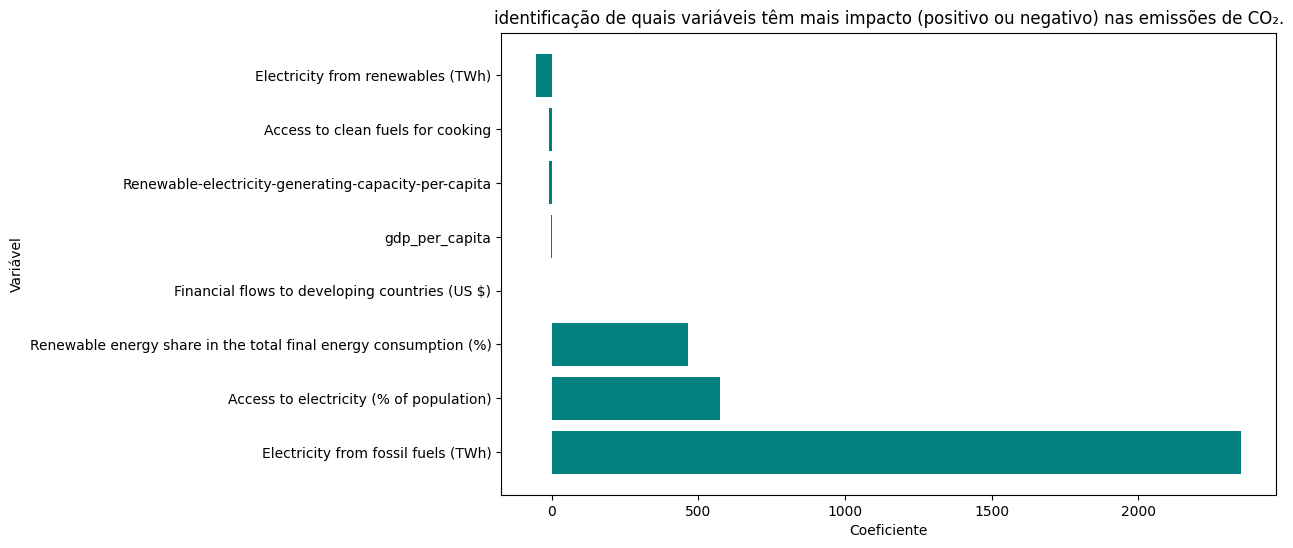

In [10]:
features = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable-electricity-generating-capacity-per-capita',
    'Financial flows to developing countries (US $)',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from renewables (TWh)',
    'gdp_per_capita'
]
target = 'Value_co2_emissions_kt_by_country'

df_clean = df_ml[features + [target]].dropna()

X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"R-squared: {r2}")

coefficients = pd.DataFrame({
    'Feature': features,
    'Coeficiente': model.coef_
})
print(coefficients)

coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)


# Gráfico de comparação de importância das váriaveis
plt.figure(figsize=(10, 6))
plt.barh(coefficients["Feature"], coefficients["Coefficient"], color='teal')
plt.title("identificação de quais variáveis têm mais impacto (positivo ou negativo) nas emissões de CO₂.")
plt.xlabel("Coeficiente")
plt.ylabel("Variável")
plt.show()


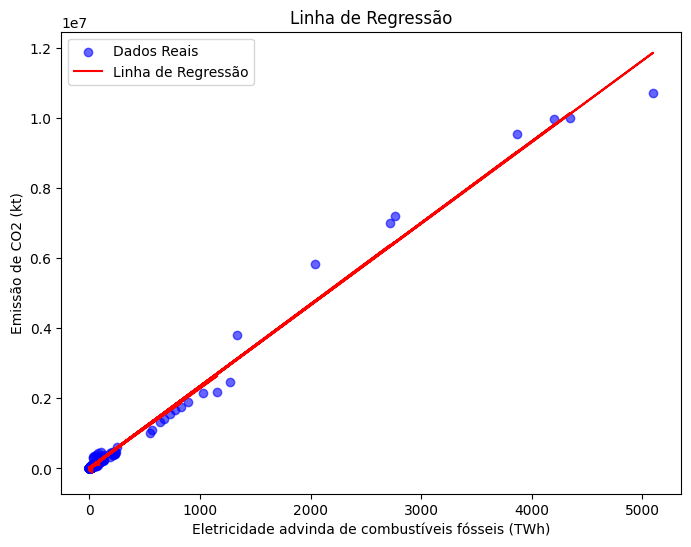

In [11]:
# Exemplo da Linha de Regressão com uma variável (Eletricidade advinda de combustíveis fósseis)
plt.figure(figsize=(8, 6))
plt.scatter(X_test["Electricity from fossil fuels (TWh)"], y_test, alpha=0.6, color='blue', label="Dados Reais")
plt.plot(X_test["Electricity from fossil fuels (TWh)"], y_pred, color='red', label="Linha de Regressão")
plt.title("Linha de Regressão")
plt.xlabel("Eletricidade advinda de combustíveis fósseis (TWh)")
plt.ylabel("Emissão de CO2 (kt)")
plt.legend()
plt.show()

#### Modelo de Classificação

In [12]:

df_class = df_ml
threshold = 30
df_class['HighRenewables'] = df_class['Renewable energy share in the total final energy consumption (%)'] > threshold

features = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable-electricity-generating-capacity-per-capita',
    'Financial flows to developing countries (US $)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'
]

df_class = df_class.dropna(subset=features)

X = df_class[features]
y = df_class['HighRenewables']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(f'Precisão: {accuracy_score(y_test, y_pred)}')
print('Reporte de Classificação:')
print(classification_report(y_test, y_pred))


Precisão: 0.9761092150170648
Reporte de Classificação:
              precision    recall  f1-score   support

       False       0.97      0.96      0.97       111
        True       0.98      0.98      0.98       182

    accuracy                           0.98       293
   macro avg       0.98      0.97      0.97       293
weighted avg       0.98      0.98      0.98       293



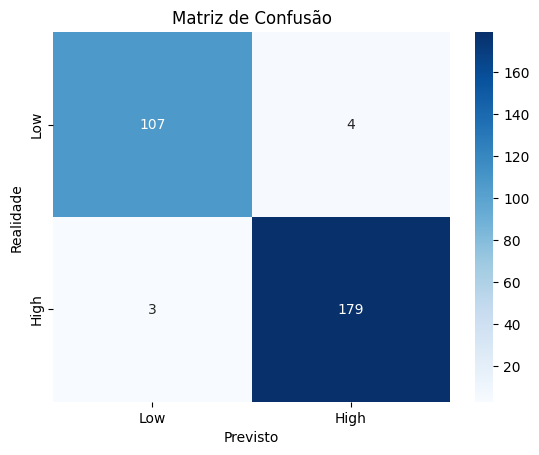

In [13]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Previsto")
plt.ylabel("Realidade")
plt.title("Matriz de Confusão")
plt.show()


## Conclusões
Após a análise, identificamos padrões importantes nas emissões globais de CO2. Observamos tendências regionais, correlações significativas e previsões interessantes com os modelos treinados.

### Modelo de Regressão
O modelo apresenta com um desempenho muito bom, conforme indicado pelo R-quadrado de 0.99, o que significa que cerca de 99,0% da variância nas emissões de CO₂ pode ser explicada pelas variáveis preditoras incluídas no modelo. Isso sugere que o modelo tem uma forte capacidade de previsão e é eficaz em capturar padrões presentes nos dados.

Entretanto, o Erro Quadrático Médio (MSE) indica que as previsões ainda apresentam variações consideráveis, especialmente considerando que as emissões de CO₂ variam amplamente entre os países.
### Modelo de Classificação
O modelo parece ter um bom desempenho com base no relatório de classificação, com uma alta precisão, recall e F1-score, indicando que ele está conseguindo prever corretamente as classes de "alta" e "baixa" participação de energia renovável.